In [2]:
import pandas as pd
from statsmodels.tsa.filters.hp_filter import hpfilter
import matplotlib.pyplot as plt
from utils.plotter import plot_with_presidents

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
%matplotlib agg

fig, ax = plt.subplots(figsize=(12,6))

In [12]:
df_deseas = pd.read_parquet('../data/even_cooler_guy.parquet')
ipc = pd.read_parquet('../data/argetina_ipc_meu.parquet', columns=['ipc_tucuman'])

In [4]:
coef_elasticity_expenditure = 1.03 # cepal
coef_elasticity_revenue     = 1.23 # cepal

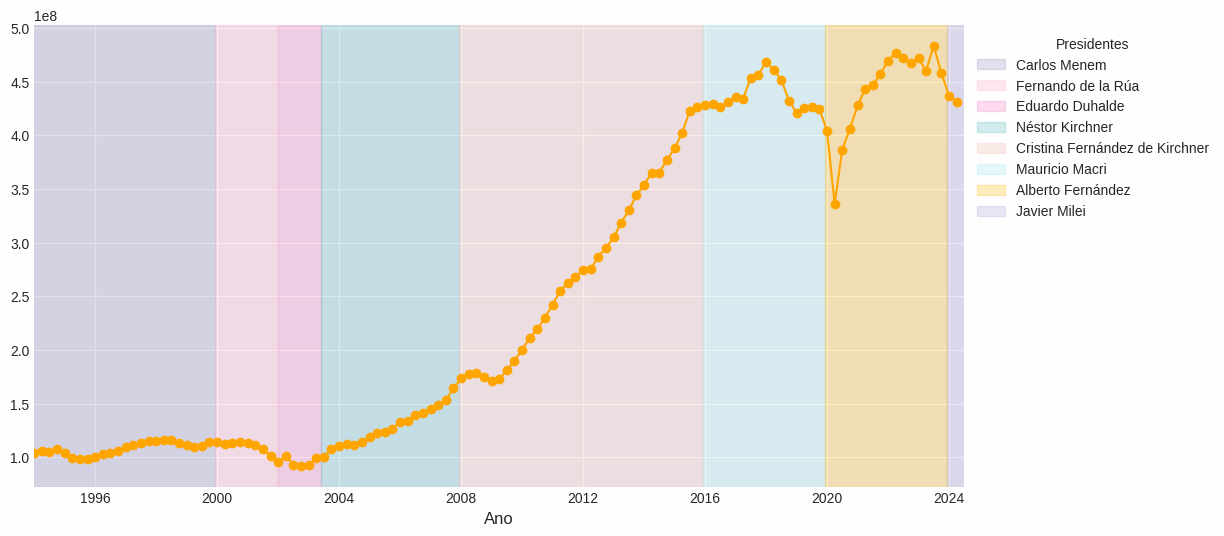

In [11]:
ax.clear()

plot_with_presidents(
	df_deseas.index,
	df_deseas.gdp_real,
	ax=ax,
	# title='PIB Real (em milhões de pesos argentinos)',
	xlabel='Ano'
)

fig

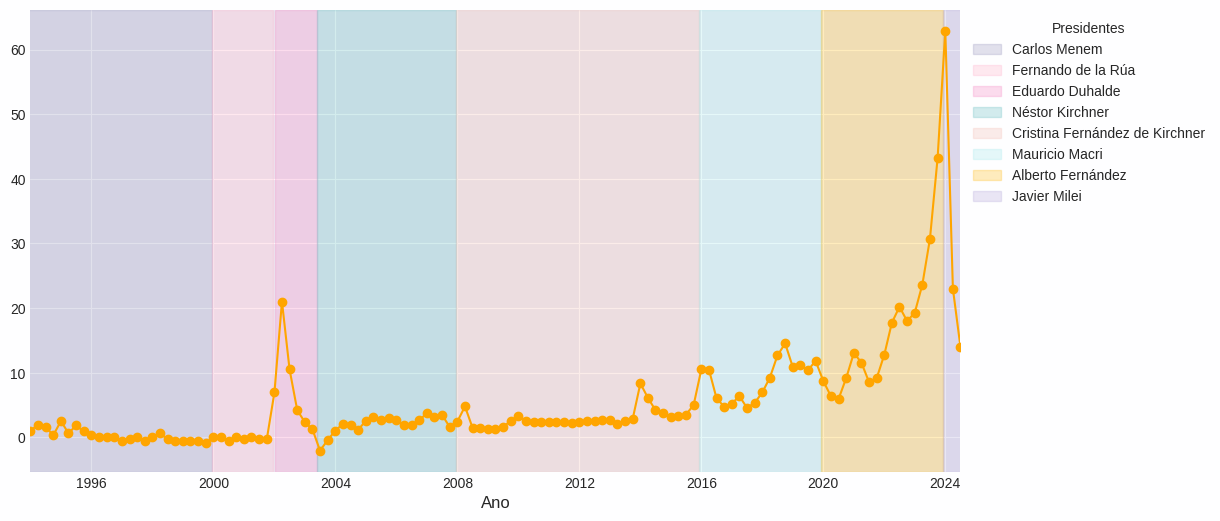

In [31]:
ax.clear()

ipc_2 = ipc.resample('QS').sum()
# ipc_2 = ipc[(ipc.index>pd.to_datetime('1993-01-01')) & (ipc.index<pd.to_datetime('2020-01-01'))].resample('QS').sum()

plot_with_presidents(
	ipc_2.index,
	ipc_2.ipc_tucuman.pct_change()*100,
	ax=ax,
	# ylim=[-4, 30],
	# title='PIB Real (em milhões de pesos argentinos)',
	xlabel='Ano'
)

fig

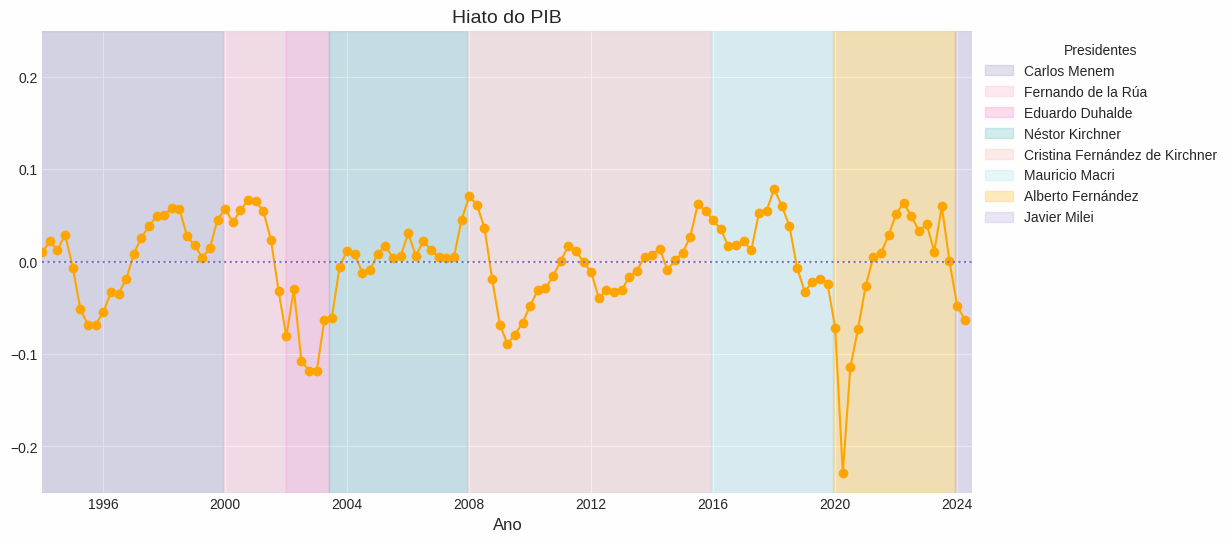

In [8]:
ax.clear()

cycle, trend = hpfilter(df_deseas.gdp_real, lamb=1600)

df_deseas['gdp_potential'] = trend
df_deseas['gdp_gap'] = (df_deseas.gdp_real - df_deseas.gdp_potential) / df_deseas.gdp_potential

plot_with_presidents(
	df_deseas.index,
	df_deseas.gdp_gap,
	ax=ax,
	title='Hiato do PIB',
	xlabel='Ano',
	ylim=[-0.25, 0.25]
)

ax.axhline(0, linestyle=':')

fig#

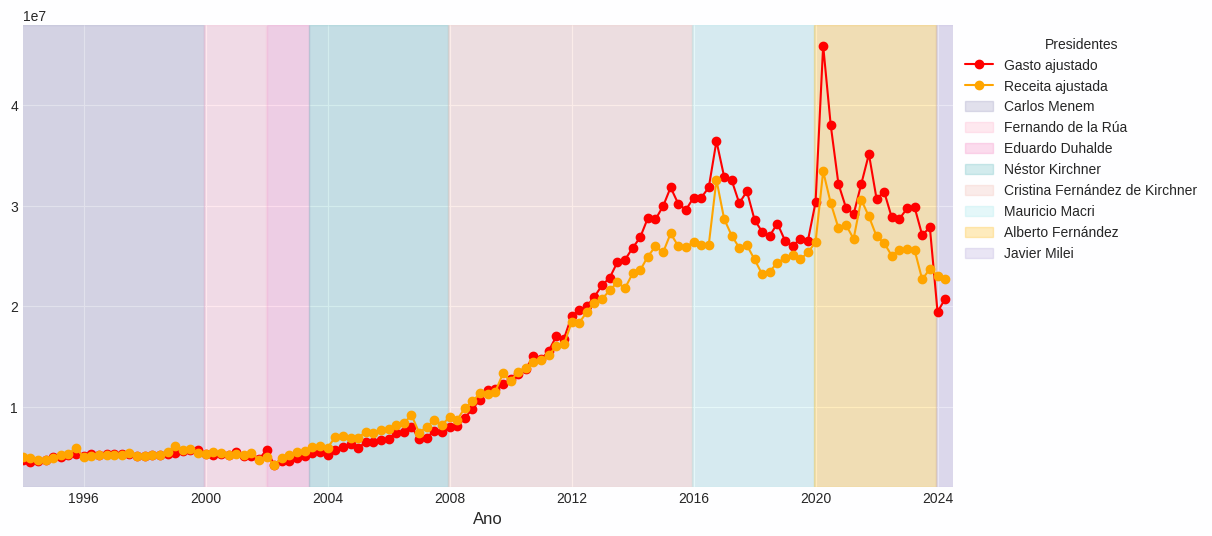

In [9]:
ax.clear()
df_deseas['revenue_adj']     = df_deseas.revenue     - coef_elasticity_revenue     * df_deseas.revenue     * df_deseas.gdp_gap
df_deseas['expenditure_adj'] = df_deseas.expenditure - coef_elasticity_expenditure * df_deseas.expenditure * df_deseas.gdp_gap

ax.plot(
	df_deseas.expenditure_adj,
	marker='o',
	color='red',
	label='Gasto ajustado'
)

plot_with_presidents(
	df_deseas.index,
	df_deseas.revenue_adj,
	ax=ax,
	# title='Valores fiscais ajustados',
	label='Receita ajustada',
	xlabel='Ano',
)


fig

In [10]:
df_deseas[['revenue_adj', 'expenditure_adj', 'gdp_real']].to_parquet('../data/for_the_model.parquet')